In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statistics import mode
from sklearn.metrics import accuracy_score
from joblib import Parallel, delayed
import multiprocessing
import matplotlib
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn import svm


#Taking input from csv file and taking x and y out
train=['coast','forest','opencountry','street','tallbuilding']
data=pd.DataFrame()
for c, train_file in enumerate(train):
    data_2=pd.read_csv('dataset/'+train_file+'/train.csv')
    #data_2=data_2.to_numpy()
    #print(data_2)
    data_2['Y']=c
    X=data_2.iloc[:,1:]
    #print(X)
    data=pd.concat([data,X],ignore_index=True)

#print(data)

X_train=data.iloc[:,:-1]
Y_train=data.iloc[:,-1]

X_train=X_train.to_numpy()
Y_train=Y_train.to_numpy()
#print(X_train)

X_valid=pd.DataFrame()
X_test=pd.DataFrame()
for c, train_file in enumerate(train):
    data_2=pd.read_csv('dataset/'+train_file+'/dev.csv')
    #data_2=data_2.to_numpy()
    #print(data_2)
    data_2['Y']=c
    X=data_2.iloc[:,1:]
    #print(X)
    X_valid=pd.concat([X_valid,X.iloc[0:int(data_2.shape[0]/2),:]],ignore_index=True)
    X_test=pd.concat([X_test,X.iloc[int(data_2.shape[0]/2):,:]],ignore_index=True)

Y_valid=X_valid.iloc[:,-1]
Y_test=X_test.iloc[:,-1]

X_valid=X_valid.iloc[:,:-1]

X_test=X_test.iloc[:,:-1]

X_valid=X_valid.to_numpy()
Y_valid=Y_valid.to_numpy()

X_test=X_test.to_numpy()
Y_test=Y_test.to_numpy()



C=[0.0001,0.001,0.01,0.1,2.5,3,3.1,4,5,7,16,50,75,100,150]
#print(X_train.shape)

for c in C:
    clf = svm.SVC(C=c,kernel='rbf',decision_function_shape='ovr',gamma=4)
    clf.fit(X_train, Y_train)
    #print(clf.predict(X_valid))
    predicted=clf.predict(X_valid)
    print("accuracy for C="+str(c)+" on validation set is "+str(accuracy_score(Y_valid,predicted)*100))
    predicted=clf.predict(X_train)
    print("accuracy for C="+str(c)+" on training set is "+str(accuracy_score(Y_train,predicted)*100))

clf = svm.SVC(C=2.77,kernel='rbf',decision_function_shape='ovr',gamma=10)
clf.fit(X_train, Y_train)
predicted=clf.predict(X_test)
print("accuracy for C="+str(2.77)+" (Best Model) on testing set is "+str(accuracy_score(Y_test,predicted)*100))

gammas=[0.0001,0.001,0.01,0.1,1,2,4,5,7,9,9.9,10,10.5,11,12,13,17,20,22,50,100]

for le in gammas:
    clf = svm.SVC(C=2.77,kernel='rbf',decision_function_shape='ovr',gamma=le)
    clf.fit(X_train, Y_train)
    #print(clf.predict(X_valid))
    predicted=clf.predict(X_valid)
    print("accuracy for gamma="+str(le)+" on validation set is "+str(accuracy_score(Y_valid,predicted)*100))


accuracy for C=0.0001 on validation set is 23.563218390804597
accuracy for C=0.0001 on training set is 23.524590163934427
accuracy for C=0.001 on validation set is 23.563218390804597
accuracy for C=0.001 on training set is 23.524590163934427
accuracy for C=0.01 on validation set is 23.563218390804597
accuracy for C=0.01 on training set is 23.524590163934427
accuracy for C=0.1 on validation set is 58.04597701149425
accuracy for C=0.1 on training set is 63.196721311475414
accuracy for C=2.5 on validation set is 62.06896551724138
accuracy for C=2.5 on training set is 86.96721311475409
accuracy for C=3 on validation set is 61.49425287356321
accuracy for C=3 on training set is 88.11475409836066
accuracy for C=3.1 on validation set is 60.91954022988506
accuracy for C=3.1 on training set is 88.36065573770492
accuracy for C=4 on validation set is 60.91954022988506
accuracy for C=4 on training set is 90.81967213114754
accuracy for C=5 on validation set is 61.49425287356321
accuracy for C=5 on t

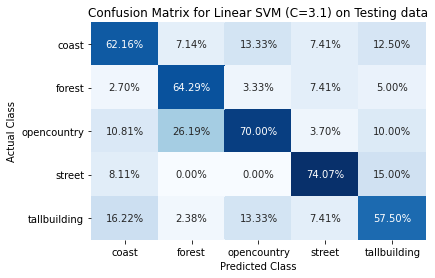

In [2]:
confuse=confusion_matrix(Y_test,predicted)

sn.heatmap(confuse/np.sum(confuse,axis=0), annot=True,
    fmt='.2%', cmap='Blues',cbar=False,xticklabels=train,yticklabels=train)
plt.xlabel('Predicted Class')
plt.ylabel("Actual Class")
plt.title(f'Confusion Matrix for Linear SVM (C={3.1}) on Testing data')
#plt.savefig('Confusion_test_2.png')

plt.show()

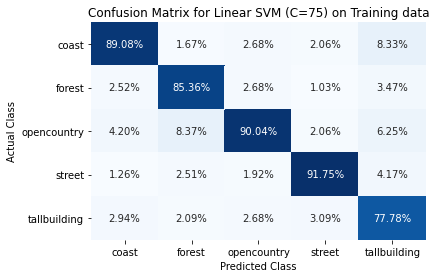

In [3]:
predicted=clf.predict(X_train)
confuse=confusion_matrix(Y_train,predicted)

sn.heatmap(confuse/np.sum(confuse,axis=0), annot=True,
    fmt='.2%', cmap='Blues',cbar=False,xticklabels=train,yticklabels=train)
plt.xlabel('Predicted Class')
plt.ylabel("Actual Class")
plt.title(f'Confusion Matrix for Linear SVM (C=75) on Training data')
#plt.savefig('Confusion_test_2.png')

plt.show()
